In [52]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset 

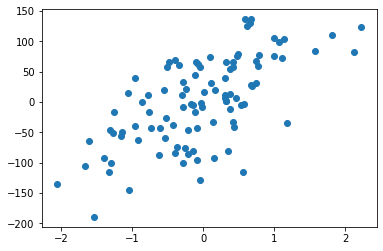

In [53]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
plt.scatter(x[:,0], y)

In [54]:
# Checking dimensions
print(x.shape)
print(y.shape)

# Redimension y
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [55]:
# Creating matrix X, including biais
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X[:10])

(100, 3)
[[-0.10230024  1.25260302  1.        ]
 [-0.11258141  0.83155966  1.        ]
 [-0.52600108 -0.21719036  1.        ]
 [ 0.37027007  0.37971447  1.        ]
 [ 0.1312587  -0.31497787  1.        ]
 [ 0.32167321 -0.73764942  1.        ]
 [-0.42900826 -0.15763183  1.        ]
 [-0.73423016 -0.27957552  1.        ]
 [-0.39996309  1.9133084   1.        ]
 [ 0.30215706  0.30779081  1.        ]]


In [56]:
# Intitializing theta randomly
theta = np.random.randn(3,1)
theta

array([[-1.8091052 ],
       [ 0.10396576],
       [-0.19738021]])

# 2. Model

In [57]:
def model(X, theta):
    return X.dot(theta)

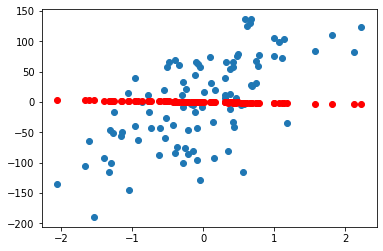

In [58]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c="r")

# 3. Cost Function

In [59]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [60]:
cost_function(X, y, theta)

2574.0940617976485

# 4. Gradients and Gradient Descent

In [72]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [73]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    #theta_history = np.zeros((n_iterations, 3))
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        #theta_history[i,:] = theta.T
    return theta, cost_history, theta_history

# 5. Training Phase

In [74]:
n_iterations = 1000
learning_rate = 0.01

final_theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [75]:
final_theta
#print(theta_history.shape)

array([[45.45135033],
       [53.39971115],
       [ 0.35436669]])

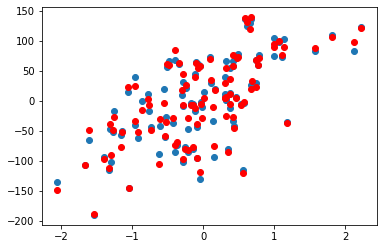

In [76]:
predictions = model(X, final_theta)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], predictions, c='r')
#for i in range(n_iterations):
    #plt.plot(x, model(x, theta_history[i]))

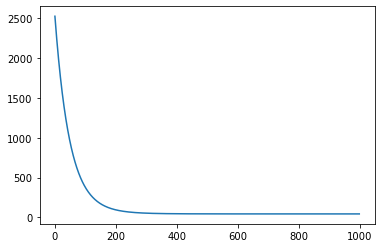

In [77]:
plt.plot(range(1000), cost_history)

In [78]:
def determination_coef(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [79]:
determination_coef(y, predictions)

0.9822731581025744